In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

## Setup

In [79]:
size = 1000
p_grid = np.linspace(0, 1, size)
prior = np.repeat(1, size)
likelihood = stats.binom.pmf(6, 9, p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

samples = np.random.choice(p_grid, p=posterior, size=size, replace=True)

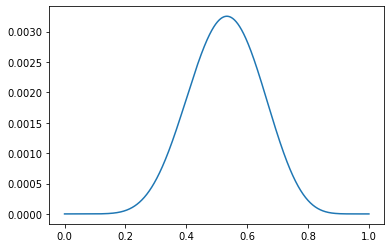

In [113]:
plt.plot(p_grid, posterior)

## Easy

__3E1__

In [82]:
sum(samples<.2)/size

0.001

__3E2__

In [83]:
sum(samples>.8)/size

0.133

__3E3__

In [91]:
sum((samples<.8) & (samples>.2)) / size

0.866

__3E4__

In [97]:
np.percentile(samples, 20)

0.5325325325325325

__3E5__

In [98]:
np.percentile(samples, 80)

0.764964964964965

__3E6__

In [103]:
az.hdi(samples, .66)

array([0.54254254, 0.8008008 ])

__3E7__

In [108]:
np.percentile(samples,[17, 83])

array([0.51151151, 0.77594595])

## Medium

__3M1__

In [130]:
size = 1000
p_grid = np.linspace(0, 1, size)
prior = np.repeat(1, size)
likelihood = stats.binom.pmf(8, 15, p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

samples = np.random.choice(p_grid, p=posterior, size=size, replace=True)

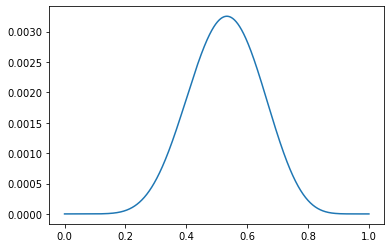

In [131]:
plt.plot(p_grid, posterior)

__3M2__

In [132]:
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

In [133]:
az.hdi(samples, .9)

array([0.33033033, 0.71671672])

__3M3__

In [134]:
water = stats.binom.rvs(n=15, p=samples, size=10000)
sum(water==8) / 10000

0.1411

__3M4__

In [135]:
water = stats.binom.rvs(n=9, p=samples, size=10000)
sum(water==6) / 10000

0.1794

__3M5__

In [136]:
size = 1000
p_grid = np.linspace(0, 1, size)
prior = np.where(p_grid<.5, 0, 1)
likelihood = stats.binom.pmf(8, 15, p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

samples = np.random.choice(p_grid, p=posterior, size=size, replace=True)

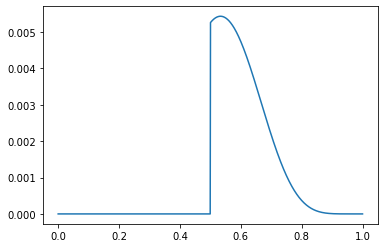

In [137]:
plt.plot(p_grid, posterior)

In [148]:
az.hdi(samples, .9)

array([0.5005005 , 0.72072072])

## Hard

In [154]:
birth1 = [1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1]

birth2 = [0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0]

__3H1__

In [254]:
p_grid = np.linspace(0, 1, 10000)
prior = np.repeat(1, 10000)
likelihood = stats.binom.pmf(sum(birth1+birth2), len(birth1+birth2), p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

In [255]:
ppd = stats.binom.rvs(n=200, p=samples, size=10000)

Text(0.5, 1.0, 'Posterior distribution')

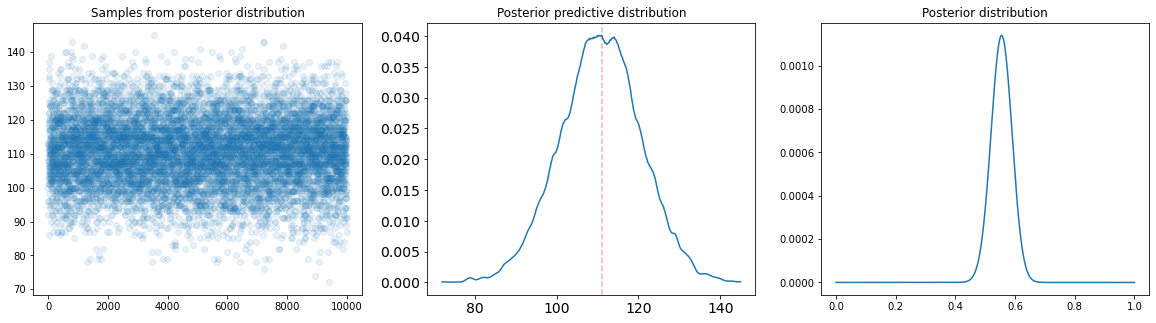

In [256]:
_, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].plot(ppd, "o", alpha=.1)
ax[0].set_title("Samples from posterior distribution")
az.plot_kde(ppd, ax=ax[1])
ax[1].set_title("Posterior predictive distribution")
ax[1].axvline(x=sum(birth1+birth2), color='r', linestyle='--', alpha=.3)
ax[2].plot(p_grid, posterior)
ax[2].set_title("Posterior distribution")

In [257]:
np.mean(samples)

0.5538155315531553

__3H2__

In [258]:
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

print("0.5 HPDI: ",az.hdi(samples, .5))
print("0.89 HPDI: ",az.hdi(samples, .89))
print("0.97 HPDI: ",az.hdi(samples, .97))

0.5 HPDI:  [0.52865287 0.57635764]
0.89 HPDI:  [0.49444944 0.60756076]
0.97 HPDI:  [0.47954795 0.63006301]


__3H3__

In [259]:
ppd = stats.binom.rvs(n=200, p=samples, size=10000)

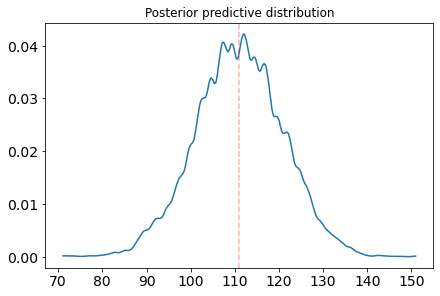

In [260]:
az.plot_kde(ppd)
plt.title("Posterior predictive distribution")
plt.axvline(x=sum(birth1+birth2), color='r', linestyle='--', alpha=.3)

The model fits the data well.

__3H4__

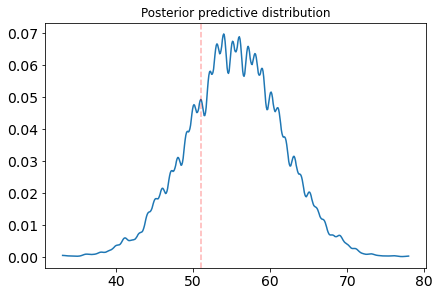

In [261]:
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)
ppd = stats.binom.rvs(n=100, p=samples, size=10000)

az.plot_kde(ppd)
plt.title("Posterior predictive distribution")
plt.axvline(x=sum(birth1), color='r', linestyle='--', alpha=.3)

In this case, the model overpredicts male births.

__3H5__

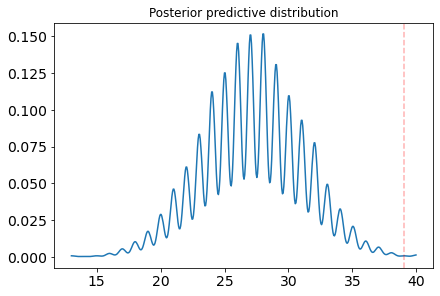

In [287]:
birth_combinations = [*zip(birth1, birth2)]
girl_first = [n[1] for n in birth_combinations if n[0]==0]

ppd = stats.binom.rvs(n=len(girl_first), p=samples, size=10000)

az.plot_kde(ppd)
plt.title("Posterior predictive distribution")
plt.axvline(x=sum(girl_first), color='r', linestyle='--', alpha=.3)

This doesn't look like we're dealing with independent observations. Conditional on the first child being a girl, the probability of the second being a boy looks higher than a random coin flip.